# Tasks
### Prepare 4 random 4-qubit quantum states of your choice.
### Construct and Train a variational circuit that 
- if random state 1 is provided, it returns state |0011>
- if random state 2 is provided, it returns state |0101>
- if random state 3 is provided, it returns state |1010>
- if random state 4 is provided, it returns state |1100>

###  What would happen if you provided a different state?


Installing libraries

In [27]:
!pip install qiskit

In [28]:
from qiskit import *
import numpy as np


In [29]:
Random_states=["1111","0000","0010","1110"]
Output_states=["0011","0101","1010","1100"]

In [30]:
def paramaterised_circuit(params):
    
    # Quantum circuit on with 4 qubits
    qc = QuantumCircuit(4, 4)
    """
    Input: params:List, len(params)==16 last index=15
    Output:Parameterised Quantum Circuit
    """
    for i in range(2):
        # Parameterized rotations
        for j in range(4):
            qc.rx(params[2*4*i + 2*j], j)
            qc.rz(params[2*4*i + 2*j+1], j)
        
        # Entanglement
        for j in range(3):
            for k in range(j+1,4):
                qc.cx(j, k)
    
    #Final rotations
    for i in range(4):
        qc.rx(params[16+(2*i)], i)
        qc.rz(params[16+(2*i+1)], i)

    qc.ccx(0,1,2)
    qc.ccx(1,2,3)
    

    
    return qc

In [31]:

def constructPQC(state,init_params:list):
  qc=QuantumCircuit(4,4)
  #Intial state preparation

  for i, qubit in enumerate(reversed(state)):
        if qubit == '1':
            qc.x(i)

  pqc=parametrised_circuit(init_params)

  qc.compose(pqc,inplace=True)

  qc.measure([0,1,2,3],[0,1,2,3])

  sim=Aer.get_backend("qasm_simulator")

  qo=assemble(qc)

  result=execute(qc,backend=sim,shots=5000).result().get_counts()

  return result


#Intial Parameter Constructon

In [32]:
init_params = np.random.default_rng().uniform(-np.pi,np.pi,24).tolist()


In [35]:
def cost_function(init_params):
  x=np.random.randint(0,4)
  circuit=constructPQC(Random_states[x],init_params)
  cost=1000
  if Output_states[x] in circuit.keys():
    out_counts=circuit[Output_states[x]]
    cost=(5000-out_counts)**2/(5000*5000)

  return cost




#Optimization

In [36]:
print(cost_function(init_params))

0.91278916


In [37]:
from qiskit.algorithms.optimizers import ADAM

opt = ADAM(maxiter=512)

param_bounds = np.array([(-np.pi, np.pi)]*24)

best_params, min_cost,trere = opt.optimize(24,objective_function=cost_function,
                                             initial_point=init_params,
                                             variable_bounds=param_bounds)
print(f"Optimized params:\n{best_params}")
print("Optimized cost:", min_cost)


Optimized params:
[-1.46706975 -1.60822277  2.56149221 -2.22292487 -3.02424273 -0.3916449
 -1.98029369 -0.94110345 -2.50160142 -1.33188263 -2.24126392  1.85659492
 -2.78695165 -2.64802459 -1.53849804 -0.06577713 -2.23202016 -3.00570762
 -3.15041681  2.01115158  2.31402524 -2.3963858  -1.13343021 -2.49159615]
Optimized cost: 0.81577024


In [38]:
print(cost_function(best_params))

0.7056


## What would happen if we provide a different state:-

In [39]:
state="1001"
outs=constructPQC(state,best_params)



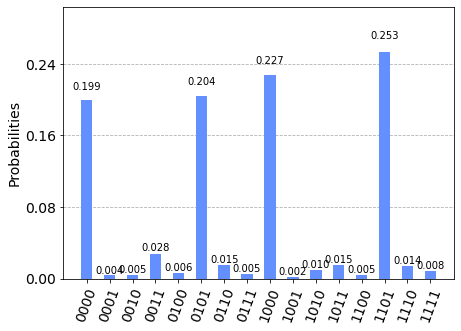

In [40]:
from qiskit.visualization import plot_histogram
display(plot_histogram(outs))